# Distribution of branch durations in ARGs
### Figures

---

In [1]:
import tskit
import stdpopsim
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
from tqdm.notebook import tqdm

import sys 
sys.path.append('..')
import argbd.branchdurations
import argbd.viz
import argbd.simulations
import argbd.receffect

col_green = "#228833"
col_red = "#EE6677"
col_purp = "#AA3377"
col_blue = "#66CCEE"
col_yellow = "#CCBB44"
col_indigo = "#4477AA"
col_grey = "#BBBBBB"

fig_loc = '../../figures/'
trees_loc = '../../trees/'
results_loc = '../../results/'

# Simulation parameters
species = stdpopsim.get_species("HomSap")
chr21_contig = species.get_contig(chromosome='chr21', genetic_map="HapMapII_GRCh38")
chr21_mutation_rate = chr21_contig.mutation_rate
chr21_recombination_map = chr21_contig.recombination_map
None_contig = species.get_contig(length=5e6)
None_mutation_rate = None_contig.mutation_rate
None_recombination_map = None_contig.recombination_map
Ne = species.population_size

# Example of running branch duration calculations

Computing branch p-values: 100%|█████████████████████████████████████████████| 17165/17165 [00:04<00:00, 4228.75it/s]


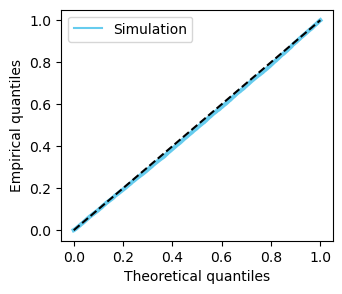

In [2]:
ts = tskit.load(trees_loc + 'None/simulated_data_smc_prime_10.trees')
results = argbd.branchdurations.gof_calc(
    ts,
    None_recombination_map,
    Ne,
)
argbd.viz.qqplot(
    [results],
    size=(3.5, 3),
)

# Loading results

In [3]:
sim_results_None_100 = pickle.load(open(results_loc + "None/simulated_data_smc_prime_100.results.pickle", "rb"))
sim_results_None_100_hudson = pickle.load(open(results_loc + "None/simulated_data_hudson_100.results.pickle", "rb"))
sim_results_None_100_smc = pickle.load(open(results_loc + "None/simulated_data_smc_100.results.pickle", "rb"))

sim_results_chr21_10 = pickle.load(open(results_loc + "chr21/simulated_data_smc_prime_10.results.pickle", "rb"))
sim_results_chr21_100 = pickle.load(open(results_loc + "chr21/simulated_data_smc_prime_100.results.pickle", "rb"))
sim_results_chr21_100_hudson = pickle.load(open(results_loc + "chr21/simulated_data_hudson_100.results.pickle", "rb"))
sim_results_chr21_100_smc = pickle.load(open(results_loc + "chr21/simulated_data_smc_100.results.pickle", "rb"))
sim_results_chr21_1000 = pickle.load(open(results_loc + "chr21/simulated_data_smc_prime_1000.results.pickle", "rb"))

argn_results_chr21_10 = pickle.load(open(results_loc + "chr21/argneedle_smc_prime_10.results.pickle", "rb"))
argn_results_chr21_100 = pickle.load(open(results_loc + "chr21/argneedle_smc_prime_100.results.pickle", "rb"))
argn_results_chr21_1000 = pickle.load(open(results_loc + "chr21/argneedle_smc_prime_1000.results.pickle", "rb"))

relate_results_chr21_10 = pickle.load(open(results_loc + "chr21/relate_smc_prime_10.results.pickle", "rb"))
relate_results_chr21_100 = pickle.load(open(results_loc + "chr21/relate_smc_prime_100.results.pickle", "rb"))
relate_results_chr21_1000 = pickle.load(open(results_loc + "chr21/relate_smc_prime_1000.results.pickle", "rb"))

tsdate_results_chr21_10 = pickle.load(open(results_loc + "chr21/tsdate_smc_prime_10.results.pickle", "rb"))
tsdate_results_chr21_100 = pickle.load(open(results_loc + "chr21/tsdate_smc_prime_100.results.pickle", "rb"))
tsdate_results_chr21_1000 = pickle.load(open(results_loc + "chr21/tsdate_smc_prime_1000.results.pickle", "rb"))

argw_results_None_10 = pickle.load(open(results_loc + "None/argweaver_smc_prime_10.results.pickle", "rb"))

---

# Re-calculating probabilities for each tree where branch exists

## Figure A2

In [4]:
ts = tskit.load(trees_loc + 'chr21/simulated_data_smc_prime_100.trees')

In [5]:
results_all, results_sum = argbd.branchdurations.test_tree_effect(
    ts,
    Ne,
    sample_branches=1000,
)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:47<00:00,  4.39it/s]


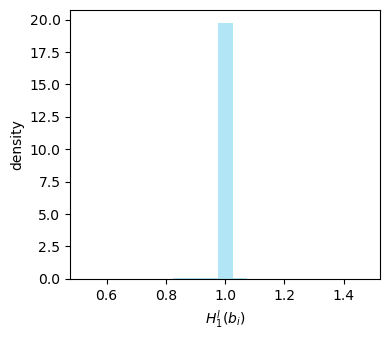

In [6]:
stepsize = 0.05
plt.figure(figsize=(4, 3.5))
plt.hist(results_all, bins=np.arange(0.5 + stepsize/2, 1.5 + stepsize/2, stepsize), color=col_blue, alpha = 0.5, density=True)
plt.xlabel('$H_1^l(b_i)$')
plt.ylabel('density')
plt.tight_layout()

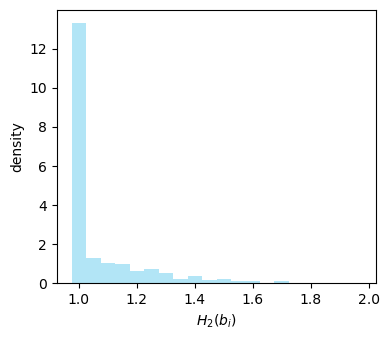

In [7]:
stepsize = 0.05
plt.figure(figsize=(4,3.5))
plt.hist(results_sum, bins=np.arange(1 - stepsize/2, 2 + stepsize/2, stepsize), color=col_blue, alpha = 0.5, density=True)
plt.xlabel('$H_2(b_i)$')
plt.ylabel('density')
plt.tight_layout()

---

# Q-Q plots

## Figure 6

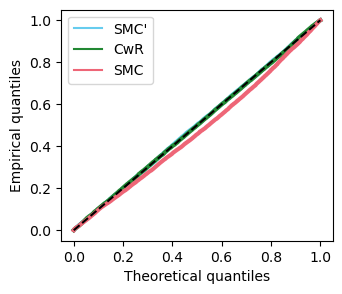

In [8]:
argbd.viz.qqplot(
    [sim_results_chr21_100, sim_results_chr21_100_hudson, sim_results_chr21_100_smc],
    legend_labels=["SMC'", "CwR", "SMC"],
    size = (3.5, 3),
)

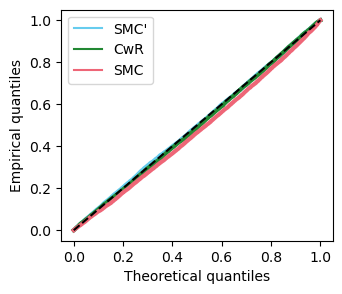

In [9]:
argbd.viz.qqplot(
    [sim_results_None_100, sim_results_None_100_hudson, sim_results_None_100_smc],
    legend_labels=["SMC'", "CwR", "SMC"],
    size = (3.5, 3),
)

Corresponding K-S $p$-values

In [10]:
print(scipy.stats.kstest(sim_results_chr21_100.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_chr21_100_hudson.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_chr21_100_smc.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_None_100.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_None_100_hudson.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_None_100_smc.qsorted, scipy.stats.uniform.cdf))

KstestResult(statistic=0.006734198881099052, pvalue=0.7522217758829779)
KstestResult(statistic=0.0053242077749958705, pvalue=0.9379012837450094)
KstestResult(statistic=0.04931200130033897, pvalue=1.4273686687894137e-21)
KstestResult(statistic=0.009655254490027576, pvalue=0.30684219637582644)
KstestResult(statistic=0.013253116070703064, pvalue=0.05909108927773654)
KstestResult(statistic=0.038936708401223874, pvalue=1.309818717331366e-13)


## Figure 9

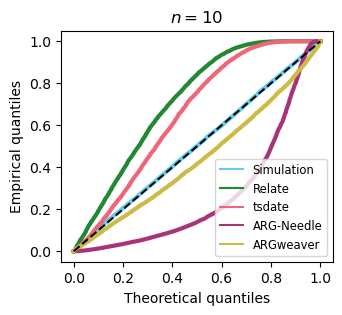

In [11]:
argbd.viz.qqplot(
    [
    sim_results_chr21_10,    
    relate_results_chr21_10,
    tsdate_results_chr21_10,
    argn_results_chr21_10,
    argw_results_None_10,
    ],
    figtitle="$n=10$",
    size = (3.5, 3),
    legend_loc='lower right',
    legend_font='small',
    legend_labels=["Simulation", "Relate", "tsdate", "ARG-Needle", "ARGweaver"],
)

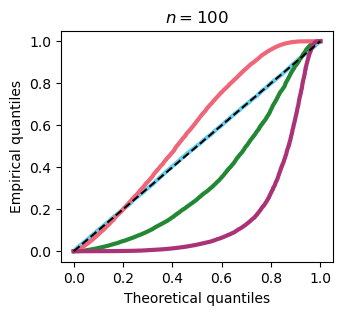

In [12]:
argbd.viz.qqplot(
    [
    sim_results_chr21_100,
    relate_results_chr21_100,
    tsdate_results_chr21_100,
    argn_results_chr21_100,
    ],
    figtitle="$n=100$",
    no_legend=True,
    size = (3.5, 3),
)

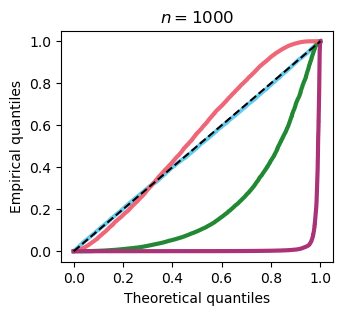

In [13]:
argbd.viz.qqplot(
    [
    sim_results_chr21_1000, 
    relate_results_chr21_1000, 
    tsdate_results_chr21_1000,
    argn_results_chr21_1000,
    ],
    figtitle="$n=1000$",
    no_legend=True,
    size = (3.5, 3),
)

## Figure A3

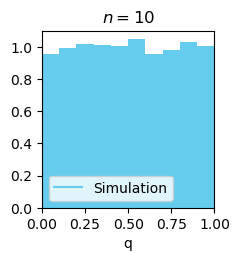

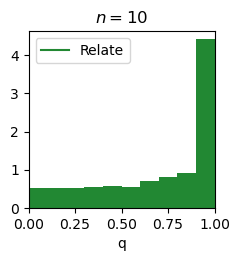

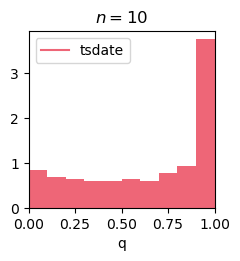

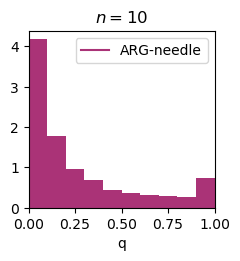

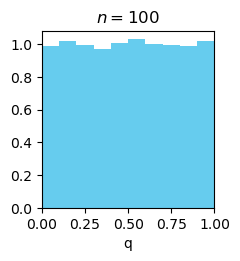

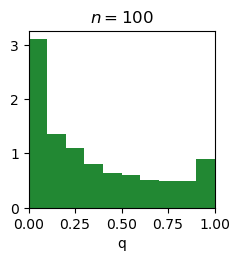

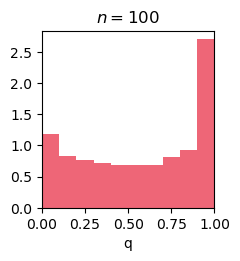

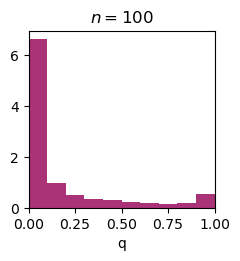

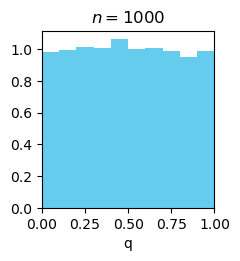

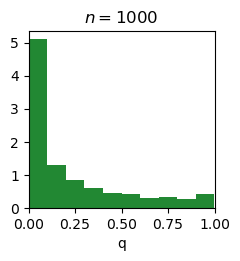

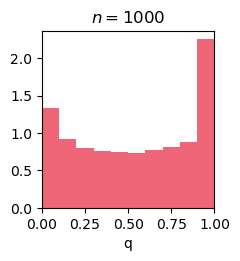

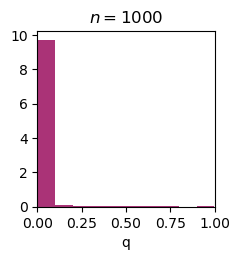

In [14]:
plotsize = (2.5, 2.5)

argbd.viz.qqplot(
    [
    sim_results_chr21_10,
    ],
    hist_plot=True,
    figtitle="$n=10$",
    size = plotsize,
    legend_labels=["Simulation"],
    legend_loc='lower left',
)
argbd.viz.qqplot(
    [
    relate_results_chr21_10,
    ],
    hist_plot=True,
    figtitle="$n=10$",
    size = plotsize,
    legend_labels=["Relate"],
    legend_loc='upper left',
    colors=[col_green],
)
argbd.viz.qqplot(
    [
    tsdate_results_chr21_10,
    ],
    hist_plot=True,
    figtitle="$n=10$",
    size = plotsize,
    legend_labels=["tsdate"],
    legend_loc='upper left',
    colors=[col_red],
)
argbd.viz.qqplot(
    [
    argn_results_chr21_10,
    ],
    hist_plot=True,
    figtitle="$n=10$",
    size = plotsize,
    legend_labels=["ARG-needle"],
    legend_loc='upper right',
    colors=[col_purp],
)
argbd.viz.qqplot(
    [
    sim_results_chr21_100,
    ],
    hist_plot=True,
    figtitle="$n=100$",
    size = plotsize,
    no_legend=True,
)
argbd.viz.qqplot(
    [
    relate_results_chr21_100,
    ],
    hist_plot=True,
    figtitle="$n=100$",
    size = plotsize,
    colors=[col_green],
    no_legend=True,
)
argbd.viz.qqplot(
    [
    tsdate_results_chr21_100,
    ],
    hist_plot=True,
    figtitle="$n=100$",
    size = plotsize,
    colors=[col_red],
    no_legend=True,
)
argbd.viz.qqplot(
    [
    argn_results_chr21_100,
    ],
    hist_plot=True,
    figtitle="$n=100$",
    size = plotsize,
    no_legend=True,
    colors=[col_purp],
)
argbd.viz.qqplot(
    [
    sim_results_chr21_1000,
    ],
    hist_plot=True,
    figtitle="$n=1000$",
    size = plotsize,
    no_legend=True,
)
argbd.viz.qqplot(
    [
    relate_results_chr21_1000,
    ],
    hist_plot=True,
    figtitle="$n=1000$",
    size = plotsize,
    colors=[col_green],
    no_legend=True,
)
argbd.viz.qqplot(
    [
    tsdate_results_chr21_1000,
    ],
    hist_plot=True,
    figtitle="$n=1000$",
    size = plotsize,
    colors=[col_red],
    no_legend=True,
)
argbd.viz.qqplot(
    [
    argn_results_chr21_1000,
    ],
    hist_plot=True,
    figtitle="$n=1000$",
    size = plotsize,
    colors=[col_purp],
    no_legend=True,
)

## Figure A4

K-S test for depth0:KstestResult(statistic=0.013977879384389047, pvalue=0.874733996298053)
K-S test for depth1:KstestResult(statistic=0.018657906612495223, pvalue=0.6569111466193707)
K-S test for depth2:KstestResult(statistic=0.01779898380677758, pvalue=0.7320896702315829)
K-S test for depth3:KstestResult(statistic=0.030379238589132607, pvalue=0.18373349027710417)
K-S test for depth4:KstestResult(statistic=0.020870002120840836, pvalue=0.679974769428638)
K-S test for depth5:KstestResult(statistic=0.020138132910790696, pvalue=0.8631271155994976)
K-S test for depth6:KstestResult(statistic=0.02597681957592829, pvalue=0.7068228156622478)
K-S test for depth7:KstestResult(statistic=0.045003315618178164, pvalue=0.27587579058324496)
K-S test for depth8:KstestResult(statistic=0.028072067741191642, pvalue=0.9658339695401832)
K-S test for depth9:KstestResult(statistic=0.05475573125936101, pvalue=0.5157169987542286)
K-S test for depth10:KstestResult(statistic=0.09962318342207543, pvalue=0.227843907

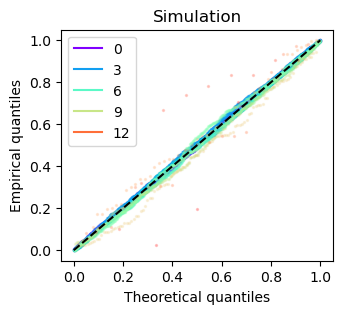

In [15]:
argbd.viz.qqplot(
    [sim_results_chr21_100], 
    depth_plot = True,
    figtitle="Simulation",
    size=(3.5,3),
)

K-S test for clade size1 with n = 1374 :KstestResult(statistic=0.022277764584686333, pvalue=0.49582034991342405)
K-S test for clade size2 with n = 980 :KstestResult(statistic=0.022477835937873558, pvalue=0.6963583435305825)
K-S test for clade size3 with n = 754 :KstestResult(statistic=0.028599845978899363, pvalue=0.5583449979819401)
K-S test for clade size4 with n = 523 :KstestResult(statistic=0.03357407554955627, pvalue=0.5853476435316688)
K-S test for clade size5 with n = 457 :KstestResult(statistic=0.04074596297075628, pvalue=0.42273605701459704)
K-S test for clade size6 with n = 412 :KstestResult(statistic=0.05223716392151234, pvalue=0.203648671812812)
K-S test for clade size7 with n = 316 :KstestResult(statistic=0.045172506467915485, pvalue=0.5244418772660873)
K-S test for clade size8 with n = 283 :KstestResult(statistic=0.057416082701224225, pvalue=0.29694823486053434)
K-S test for clade size9 with n = 251 :KstestResult(statistic=0.0779269538326946, pvalue=0.08992001454992093)
K-

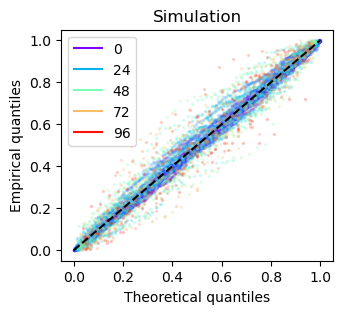

In [16]:
argbd.viz.qqplot(
    [sim_results_chr21_100], 
    cladesize_plot = True,
    size=(3.5,3),
    figtitle="Simulation",
)

K-S test for depth0:KstestResult(statistic=0.551326633614158, pvalue=5.429865583152751e-207)
K-S test for depth1:KstestResult(statistic=0.5619263717904547, pvalue=8.533e-319)
K-S test for depth2:KstestResult(statistic=0.5617086580385405, pvalue=0.0)
K-S test for depth3:KstestResult(statistic=0.5412594342456343, pvalue=4.465665780774641e-283)
K-S test for depth4:KstestResult(statistic=0.5406766570035222, pvalue=1.4575094190325753e-272)
K-S test for depth5:KstestResult(statistic=0.5354688235805257, pvalue=8.14144668091761e-236)
K-S test for depth6:KstestResult(statistic=0.5566384845545076, pvalue=3.3721136235006125e-224)
K-S test for depth7:KstestResult(statistic=0.6114978475254528, pvalue=1.0282959035823059e-243)
K-S test for depth8:KstestResult(statistic=0.6324219632562716, pvalue=3.998839136418511e-245)
K-S test for depth9:KstestResult(statistic=0.6870127777109194, pvalue=1.1314702436153318e-238)
K-S test for depth10:KstestResult(statistic=0.695629821985979, pvalue=3.4284908342095446e

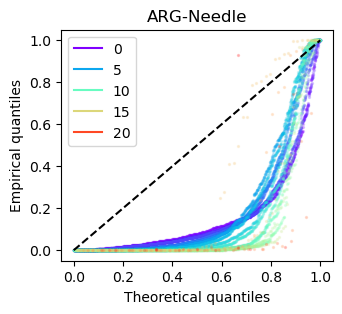

In [17]:
argbd.viz.qqplot(
    [argn_results_chr21_100], 
    depth_plot = True,
    figtitle="ARG-Needle",
    size=(3.5,3),
)

K-S test for clade size1 with n = 2397 :KstestResult(statistic=0.6874600335241239, pvalue=0.0)
K-S test for clade size2 with n = 1127 :KstestResult(statistic=0.6442639930726737, pvalue=0.0)
K-S test for clade size3 with n = 644 :KstestResult(statistic=0.5538347022525755, pvalue=2.8879014743708116e-186)
K-S test for clade size4 with n = 555 :KstestResult(statistic=0.5397430080208793, pvalue=7.540138338091651e-152)
K-S test for clade size5 with n = 401 :KstestResult(statistic=0.528133332090039, pvalue=8.005329316593692e-105)
K-S test for clade size6 with n = 309 :KstestResult(statistic=0.4782973014933638, pvalue=1.6825778018634004e-65)
K-S test for clade size7 with n = 300 :KstestResult(statistic=0.555168945750559, pvalue=1.6488070214649405e-87)
K-S test for clade size8 with n = 269 :KstestResult(statistic=0.4909238354424881, pvalue=2.5456746072632627e-60)
K-S test for clade size9 with n = 230 :KstestResult(statistic=0.5191856938353175, pvalue=3.526715052776905e-58)
K-S test for clade si

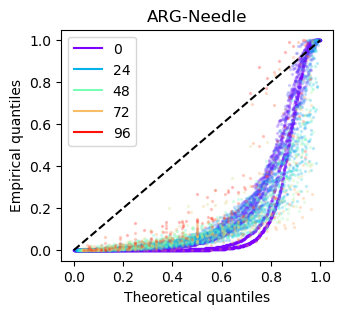

In [18]:
argbd.viz.qqplot(
    [argn_results_chr21_100], 
    cladesize_plot = True,
    size=(3.5,3),
    figtitle="ARG-Needle",
)

---

# Branch disruption probability and branch duration

## Figure 5

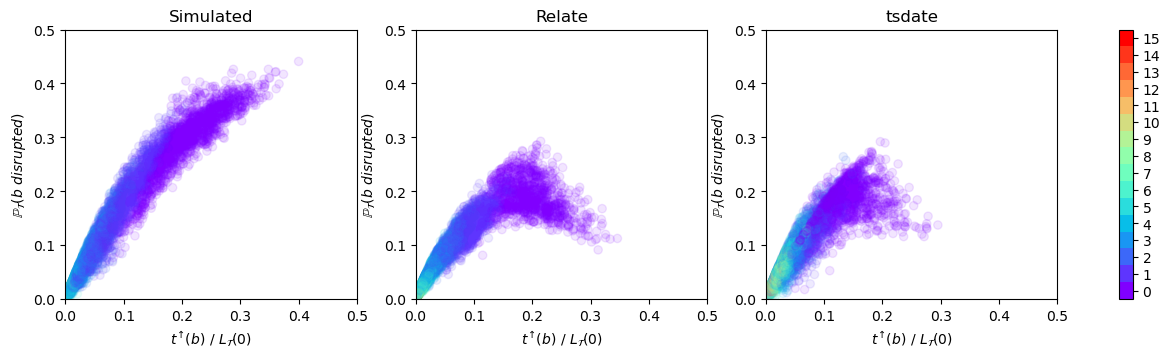

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(16, 3.5))
ax1, ax2, ax3 = axs

cmap = plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(-0.5, max(sim_results_chr21_100.depth)+1, 1), cmap.N)

sc = ax1.scatter(sim_results_chr21_100.age_norm, sim_results_chr21_100.prob, c = sim_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax1.set_xlabel("$t^↑(b) \ / \ L_\mathcal{T}(0)$")
ax1.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax1.set_xlim((0,0.5))
ax1.set_ylim((0,0.5))
ax1.set_title("Simulated")

ax2.scatter(relate_results_chr21_100.age_norm, relate_results_chr21_100.prob, c = relate_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax2.set_xlabel("$t^↑(b) \ / \ L_\mathcal{T}(0)$")
ax2.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax2.set_xlim((0,0.5))
ax2.set_ylim((0,0.5))
ax2.set_title("Relate")

ax3.scatter(tsdate_results_chr21_100.age_norm, tsdate_results_chr21_100.prob, c = tsdate_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax3.set_xlabel("$t^↑(b) \ / \ L_\mathcal{T}(0)$")
ax3.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax3.set_xlim((0,0.5))
ax3.set_ylim((0,0.5))
ax3.set_title("tsdate")

cb = fig.colorbar(sc, ax=axs, ticks = np.linspace(0,max(sim_results_chr21_100.depth)+1,max(sim_results_chr21_100.depth)+2), location = "right")
cb.set_alpha(1)
cb.draw_all()
plt.show()

---

# Change in total branch length and tree height

## Figure 6: mean probability that change in total branch length or height is positive/zero/negative

In [20]:
results_tbl = argbd.receffect.mean_change_sim(
    sim_type="tbl",
    n=50,  # diploids
    n_per_bin=5,  # this is 100 for paper figure
    bins_start=4,
    bins_end=27,
    size=(4, 3)
)

- - - - - - X - - - - - - - - - - - - - - - - -
- - - - - X X - - - - - - - - - - - - - - - - -
- - - - X X X - - - - - - - - - - - - - - - - -
- - - - X X X - X - - - - - - - - - - - - - - -
- - X - X X X - X - - - - - - - - - - - - - - -
- - X - X X X - X X - - - - - - - - - - - - - -
- - X X X X X - X X - - - - - - - - - - - - - -
- - X X X X X X X X - - - - - - - - - - - - - -
- - X X X X X X X X X - - - - - - - - - - - - -
- - X X X X X X X X X X - - - - - - - - - - - -
- - X X X X X X X X X X X - - - - - - - - - - -
- X X X X X X X X X X X X - - - - - - - - - - -
- X X X X X X X X X X X X X - - - - - - - - - -
- X X X X X X X X X X X X X - X - - - - - - - -
- X X X X X X X X X X X X X X X - - - - - - - -
- X X X X X X X X X X X X X X X X - - - - - - -
- X X X X X X X X X X X X X X X X X - - - - - -
- X X X X X X X X X X X X X X X X X X - - - - -
- X X X X X X X X X X X X X X X X X X X - - - -
X X X X X X X X X X X X X X X X X X X X - - - -
X X X X X X X X X X X X X X X X X X X X 

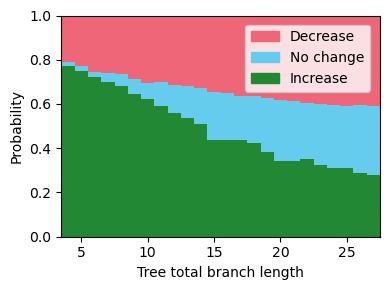

In [21]:
argbd.viz.mean_change_plot(
    results_tbl, 
    sim_type="total branch length", 
    size=(4, 3),
)

In [22]:
results_height = argbd.receffect.mean_change_sim(
    sim_type="height",
    n=50,  # diploids
    n_per_bin=5,  # this is 100 for paper figure
    bins_start=0,
    bins_end=10,
    size=(4, 3),
)

- - X - - - - - - - -
- X X - - - - - - - -
X X X - - - - - - - -
X X X X - - - - - - -
X X X X X - - - - - -
X X X X X X - - - - -
X X X X X X X - - - -
X X X X X X X X - - -
X X X X X X X X X - -
X X X X X X X X X X -
X X X X X X X X X X X



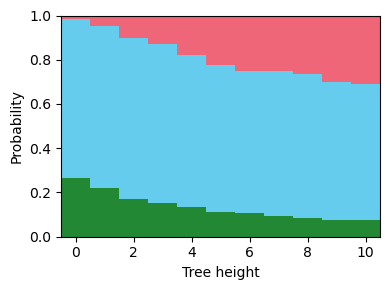

In [23]:
argbd.viz.mean_change_plot(
    results_height, 
    sim_type="height", 
    size=(4, 3),
    no_legend=True,
)

## Figure 7: density of magnitude of change in total branch length (conditional on this being non-zero)

Plotting the density for the trees in tss at the 0th, 50th, and 100th percentile of total branch length.

In [24]:
ts = tskit.load(trees_loc + "chr21/simulated_data_smc_prime_10.trees")

In [25]:
bl = np.zeros(ts.num_trees, dtype = float)
for t in ts.trees():
    bl[t.index] = t.total_branch_length/(2*Ne)

c_range = np.linspace(-1, 1, 1000)
results_ranked = np.zeros((3, len(c_range)), dtype = float)
for i, pp in enumerate([0.01, 50, 99.99]):
    bll = np.percentile(bl, pp, method = "closest_observation")
    tind = np.where(bl == bll)[0][0]
    print(tind, bll)
    t_ = ts.at_index(tind)
    tree = argbd.branchdurations.Tree(t_, Ne)
    tree.compute(t_)
    results_ranked[i] = argbd.receffect.pCc(c_range, t_, tree, verbose=False)

21267 0.990343279792474


100%|███████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 149.48it/s]


11297 5.8348711985786395


100%|███████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 113.15it/s]


22801 24.22801368101583


100%|████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 96.54it/s]


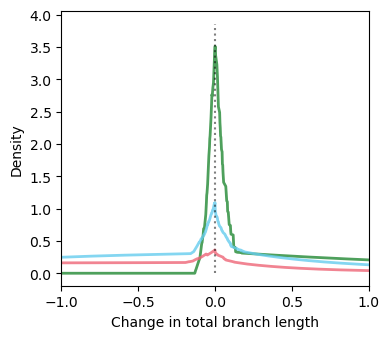

In [26]:
plt.figure(figsize=(4, 3.5))
colorpal = [col_green, col_blue, col_red]
for i in range(3):
    plt.plot(c_range, results_ranked[i], color = colorpal[i], alpha = 0.8, lw = 2)
plt.vlines(x = 0, ymin = 0, ymax = np.max(results_ranked)*1.1, color="black", alpha = 0.5, ls = ":")
plt.xlabel("Change in total branch length")
plt.ylabel("Density")
plt.xlim((-1, 1))
plt.tight_layout()
plt.show()

---

# Figure A5: Expected number of mutations per branch

In [27]:
ts_sim = tskit.load(trees_loc + "chr21/simulated_data_smc_prime_10.trees")
ts_relate = tskit.load(trees_loc + "chr21/relate_smc_prime_10.trees")
ts_tsdate = tskit.load(trees_loc + "chr21/tsdate_smc_prime_10.trees")
ts_argn = tskit.load(trees_loc + "chr21/argneedle_smc_prime_10.trees")
relate_handle = trees_loc + "chr21/relate_smc_prime_10"

# ts_sim = tskit.load(trees_loc + "chr21/simulated_data_smc_prime_100.trees")
# ts_relate = tskit.load(trees_loc + "chr21/relate_smc_prime_100.trees")
# ts_tsdate = tskit.load(trees_loc + "chr21/tsdate_smc_prime_100.trees")
# ts_argn = tskit.load(trees_loc + "chr21/argneedle_smc_prime_100.trees")
# relate_handle = trees_loc + "chr21/relate_smc_prime_100"

# ts_sim = tskit.load(trees_loc + "chr21/simulated_data_smc_prime_1000.trees")
# ts_relate = tskit.load(trees_loc + "chr21/relate_smc_prime_1000.trees")
# ts_tsdate = tskit.load(trees_loc + "chr21/tsdate_smc_prime_1000.trees")
# ts_argn = tskit.load(trees_loc + "chr21/argneedle_smc_prime_1000.trees")
# relate_handle = trees_loc + "chr21/relate_smc_prime_1000"

In [28]:
A1 = np.zeros(ts_sim.num_edges)
A2 = np.zeros(ts_tsdate.num_edges)
A3 = np.zeros(ts_argn.num_edges)
B1 = np.zeros(ts_sim.num_edges)
B2 = np.zeros(ts_tsdate.num_edges)
B3 = np.zeros(ts_argn.num_edges)
M = np.zeros(ts_sim.num_edges)
mut_dict = {e.id:0 for e in ts_sim.edges()}
for m in ts_sim.mutations():
    M[m.edge] += 1
with tqdm(total = ts_sim.num_edges) as pbar:
    for e in ts_sim.edges():
        T = ts_sim.node(e.parent).time - ts_sim.node(e.child).time
        D = e.right - e.left
        B1[e.id] = D
        A1[e.id] = T * D * chr21_mutation_rate
        pbar.update(1)
with tqdm(total = ts_tsdate.num_edges) as pbar:
    for e in ts_tsdate.edges():
        T = ts_tsdate.node(e.parent).time - ts_tsdate.node(e.child).time
        D = e.right - e.left
        B2[e.id] = D
        A2[e.id] = T * D * chr21_mutation_rate
        pbar.update(1)
with tqdm(total = ts_argn.num_edges) as pbar:
    for e in ts_argn.edges():
        T = (ts_argn.node(e.parent).time - ts_argn.node(e.child).time)
        D = e.right - e.left
        B3[e.id] = D
        A3[e.id] = T * D * chr21_mutation_rate
        pbar.update(1)
edges_relate, edge_durations_relate, edge_lengths_relate = argbd.simulations.read_anc_file(relate_handle, ts_relate.sequence_length, supported_only=False)
A4 = np.zeros(len(edges_relate))
B4 = np.zeros(len(edges_relate))
i = 0
with tqdm(total = len(edges_relate)) as pbar:
    for ind in edges_relate.values():
        left = edge_durations_relate[ind][0]
        right = edge_durations_relate[ind][1]
        B4[i] = right - left
        A4[i] = (right - left) * edge_lengths_relate[ind] * chr21_mutation_rate
        i += 1
        pbar.update(1)

  0%|          | 0/164862 [00:00<?, ?it/s]

  0%|          | 0/39339 [00:00<?, ?it/s]

  0%|          | 0/270245 [00:00<?, ?it/s]

Trees: 2907
Samples: 10
Unique branches: 24650 of which 24650 have at least one mutation


  0%|          | 0/24650 [00:00<?, ?it/s]

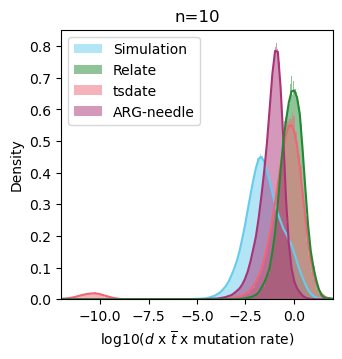

In [29]:
plt.subplots(1, 1, figsize=(3.5, 3.5))
plt.hist(np.log10(A1), bins=200, alpha = 0.5, density=True, color=col_blue, label="Simulation")
plt.hist(np.log10(A4), bins=200, alpha = 0.5, density=True, color=col_green, label="Relate")
plt.hist(np.log10(A2), bins=200, alpha = 0.5, density=True, color=col_red, label="tsdate")
plt.hist(np.log10(A3), bins=200, alpha = 0.5, density=True, color=col_purp, label="ARG-needle")
plt.xlim((-12, 2))
plt.xlabel("log10($d$ x $\overline{t}$ x mutation rate)")
plt.ylabel("Density")
plt.title("n=10")
kde1 = stats.gaussian_kde(np.log10(A1))
kde2 = stats.gaussian_kde(np.log10(A2))
kde3 = stats.gaussian_kde(np.log10(A3))
kde4 = stats.gaussian_kde(np.log10(A4))
xx = np.linspace(-12, 2, 100)
plt.plot(xx, kde1(xx), color=col_blue)
plt.plot(xx, kde2(xx), color=col_red)
plt.plot(xx, kde3(xx), color=col_purp)
plt.plot(xx, kde4(xx), color=col_green)
plt.legend(loc="upper left")

# Figure A6: Observed branch duration

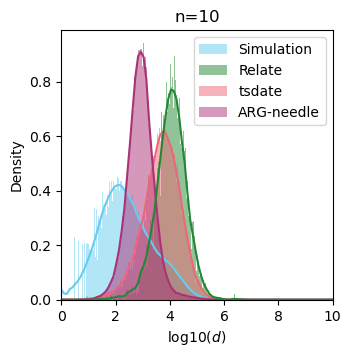

In [30]:
plt.subplots(1, 1, figsize=(3.5, 3.5))
plt.hist(np.log10(B1), bins=200, alpha = 0.5, density=True, color=col_blue, label="Simulation")
plt.hist(np.log10(B4), bins=200, alpha = 0.5, density=True, color=col_green, label="Relate")
plt.hist(np.log10(B2), bins=200, alpha = 0.5, density=True, color=col_red, label="tsdate")
plt.hist(np.log10(B3), bins=200, alpha = 0.5, density=True, color=col_purp, label="ARG-needle")
plt.xlim((0, 10))
plt.xlabel("log10($d$)")
plt.ylabel("Density")
plt.title("n=10")
kde1 = stats.gaussian_kde(np.log10(B1))
kde2 = stats.gaussian_kde(np.log10(B2))
kde3 = stats.gaussian_kde(np.log10(B3))
kde4 = stats.gaussian_kde(np.log10(B4))
xx = np.linspace(0, 10, 100)
plt.plot(xx, kde1(xx), color=col_blue)
plt.plot(xx, kde2(xx), color=col_red)
plt.plot(xx, kde3(xx), color=col_purp)
plt.plot(xx, kde4(xx), color=col_green)
plt.legend(loc="upper right")